In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import cv2

from keras.models import Model,load_model
# from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.resnet_v2 import preprocess_input
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

2023-01-26 02:26:54.347205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 02:26:54.860632: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mehathab/anaconda3/envs/corn_dev/lib/python3.8/site-packages/cv2/../../lib64::/home/mehathab/anaconda3/envs/corn_dev/lib/
2023-01-26 02:26:54.860694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /h

In [2]:
test_dir = 'test/'
image_names = os.listdir(test_dir)
classes = ['Healthy', 'Sprayable', 'Non Sprayable' ]

In [3]:
# test_dict = {'image_path':[],
#             'classification':[]}

# for i,name in enumerate(image_names):
#     name_split = name.split("_")
#     class_name = ''
#     if name_split[0] == "Non":
#         class_name = name_split[0]+" "+name_split[1]
#     else:
#         class_name = name_split[0]
        
#     test_dict['image_path'].append(test_dir+name)
#     test_dict['classification'].append(classes.index(class_name))

# test_dict = pd.DataFrame(test_dict)
# test_dict.to_csv("test.csv")

In [4]:
test_csv = pd.read_csv('test.csv')

In [5]:
x_test = test_csv['image_path']
y_test = test_csv['classification']

In [6]:
def contrast(img):
    # Contrast Streching
    img = img.astype('uint8')
    original = img.copy()
    xp = [0, 64, 128, 192, 255]
    fp = [0, 16, 128, 240, 255]
    x = np.arange(256)
    table = np.interp(x, xp, fp).astype('uint8')
    img = cv2.LUT(img, table)    
    return preprocess_input(img)

def colorspace(img,space):
    image = img.astype('uint8')
    if space =='HLS':
        img_convert = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        img_convert = contrast(img_convert)
    elif space =='RGB':
        img_convert = image
        img_convert = contrast(img_convert)
    elif space =='BGR':
        img_convert = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        img_convert = contrast(img_convert)
    elif space =='LUV':
        img_convert = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    elif space =='LAB':
        img_convert = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        img_convert = contrast(img_convert)
    elif space =='YCrCb':
        img_convert = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    elif space =='HSV':
        img_convert = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        img_convert = contrast(img_convert)
        
    return img_convert.astype('float32')

In [7]:
def resized(img,space):
    image = colorspace(img,space)

    img_resize = resize(image,(299,299,3))
    return img_resize
    

In [8]:
def model_predictor(img,space):
    predict_list = []
    predict_prob = []
    
    image = plt.imread(img)
#     image_preprocessed = preprocess_input(image)
    image_resized = resized(image,space)    
    image_expand = np.expand_dims(image_resized,axis=0)
    
    predictions = model.predict(image_expand)
    flatten_predictions = list(predictions.flatten())
    predict_prob = flatten_predictions

#     predict_prob = list(np.mean(predict_prob, axis=0))
    print("Pred Prob:",predict_prob)

    sort_predictions = np.sort(np.array(predict_prob), axis=0)
    sort_predictions = sort_predictions[::-1]
#     print(sort_predictions)

    main_predict = predict_prob.index(sort_predictions[0])
    second_predict = predict_prob.index(sort_predictions[1])
    third_predict = predict_prob.index(sort_predictions[2])

    if sort_predictions[0]:
        predict_list.append(main_predict)
#         and (sort_predictions[0] * 10 < 9)
    if sort_predictions[1] and (sort_predictions[0] * 10 < 9.5) and (sort_predictions[1] * 100 > 1):
        predict_list.append(second_predict)
    if (sort_predictions[1] - sort_predictions[2] > 0.01) and (sort_predictions[2] * 100 > 1):
        predict_list.append(third_predict)

    return [predict_list, predict_prob]

In [9]:
def predictor(image,space):
        predict, pred_prob = model_predictor(image,space)
        predicted_classes = [classes[i] for i in predict]
        return [predicted_classes, pred_prob]

<hr>

### RGB Space

#### Normal Weights

In [10]:
model = load_model('models/IncRes_RGB_model1.hdf5')
model.load_weights('weights/IncRes_RGB_model1.hdf5')

2023-01-24 19:47:36.085927: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 19:47:36.089620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 19:47:36.090067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 19:47:36.090638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

In [11]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"RGB")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.title(y_test[i])
#     plt.show()

2023-01-24 19:47:41.849047: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-01-24 19:47:42.268437: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-24 19:47:42.268870: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-24 19:47:42.268890: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-01-24 19:47:42.269270: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-24 19:47:42.269330: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


2023-01-24 19:47:43.424752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Pred Prob: [0.99999976, 2.3671997e-07, 5.320094e-12]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0022622424, 8.975001e-05, 0.99764806]


/tmp/ipykernel_9329/1492241390.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/1492241390.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 21ms/step
Pred Prob: [2.4625311e-05, 0.7360461, 0.26392925]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.0009202699, 0.49358243, 0.5054973]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.00011544529, 0.00020828363, 0.9996762]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [1.0, 4.2370019e-10, 1.5385526e-10]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.997329, 0.0026707575, 2.9312858e-07]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.00060260657, 0.022473259, 0.9769241]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [4.0731405e-09, 3.4321925e-09, 1.0]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [8.2952175e-07, 0.9448166, 0.05518258]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.041954897, 2.4954722e-06, 0.9580426]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [1.011671e-05, 0.987

RGB NormalWeights
Accuracy : 0.4666666666666667 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.25      0.18      0.21        11
           2       0.38      0.50      0.43        12

    accuracy                           0.47        30
   macro avg       0.54      0.51      0.52        30
weighted avg       0.47      0.47      0.46        30



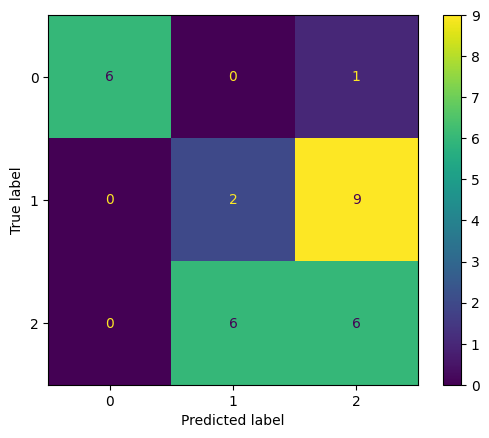

In [12]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("RGB NormalWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_RGB_model1.png")

In [13]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


#### Best Weights

In [14]:
model = load_model('models/IncRes_RGB_model1.hdf5')
model.load_weights('best_weights/IncRes_RGB_model1.hdf5')

In [15]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"RGB")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()

1/1 [==============================] - 1s 1s/step
Pred Prob: [0.99999905, 9.7394e-07, 1.8156869e-10]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0012632698, 3.7318736e-05, 0.9986994]


/tmp/ipykernel_9329/2576539196.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/2576539196.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 21ms/step
Pred Prob: [2.805377e-05, 0.18317476, 0.81679726]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.00046287774, 0.045140725, 0.9543964]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.00021302614, 0.0012430446, 0.998544]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [1.0, 9.328293e-10, 5.1980203e-10]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.99657494, 0.0034245246, 4.2309333e-07]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.0002461557, 0.024248844, 0.97550493]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [3.2768581e-09, 3.2985406e-10, 1.0]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [1.6841105e-06, 0.57103366, 0.42896464]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.03325326, 5.2275655e-06, 0.96674156]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [1.5023375e-05, 0.

RGB_bestWeights
Accuracy : 0.43333333333333335 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.14      0.09      0.11        11
           2       0.35      0.50      0.41        12

    accuracy                           0.43        30
   macro avg       0.50      0.48      0.48        30
weighted avg       0.43      0.43      0.42        30



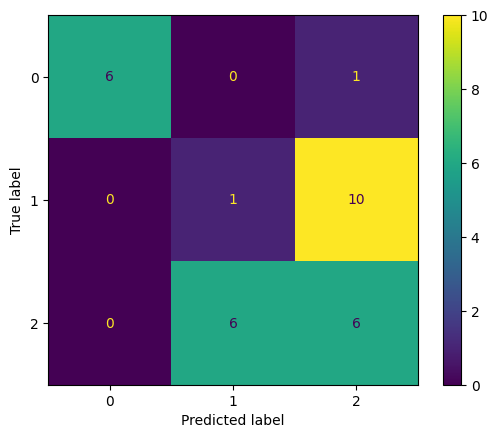

In [16]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("RGB_bestWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_RGB_Bestweights_model1.png")

In [17]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


<hr>

### BGR Space

#### Normal Weights

In [18]:
model = load_model('models/IncRes_BGR_model1.hdf5')
model.load_weights('weights/IncRes_BGR_model1.hdf5')

In [19]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"BGR")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()

    

1/1 [==============================] - 2s 2s/step
Pred Prob: [1.0, 1.4312058e-10, 5.0497402e-08]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [8.489202e-05, 3.077193e-05, 0.99988437]


/tmp/ipykernel_9329/4071084273.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/4071084273.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 22ms/step
Pred Prob: [2.6113645e-05, 0.2815694, 0.7184045]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [5.0619627e-05, 0.21183588, 0.78811353]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.00010284013, 0.0053448584, 0.9945523]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.9999999, 7.1895265e-08, 2.2812452e-09]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.999987, 1.30275e-05, 1.1457887e-08]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.003999639, 0.05027947, 0.9457209]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [1.2921254e-06, 1.1022646e-05, 0.9999877]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [1.5726713e-05, 0.98729473, 0.01268952]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.004635372, 0.7394338, 0.2559308]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [9.709282e-07, 

BGR Normal Weights
Accuracy : 0.7 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.64      0.64      0.64        11
           2       0.62      0.67      0.64        12

    accuracy                           0.70        30
   macro avg       0.75      0.72      0.73        30
weighted avg       0.71      0.70      0.70        30



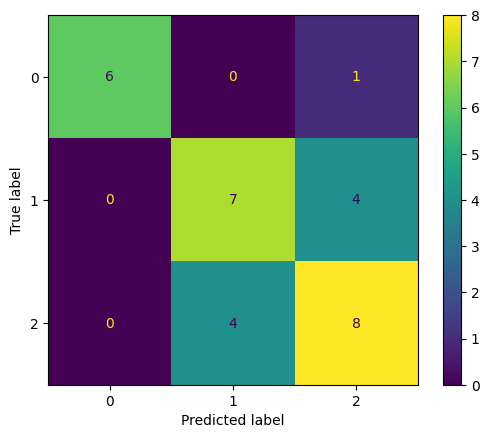

In [20]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("BGR Normal Weights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_BGR_model1.png")

In [21]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


#### Best Weights

In [22]:
model = load_model('models/IncRes_BGR_model1.hdf5')
model.load_weights('best_weights/IncRes_BGR_model1.hdf5')

In [23]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"BGR")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()

    

1/1 [==============================] - 2s 2s/step
Pred Prob: [1.0, 1.4312058e-10, 5.0497402e-08]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [8.489202e-05, 3.077193e-05, 0.99988437]


/tmp/ipykernel_9329/4071084273.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/4071084273.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 21ms/step
Pred Prob: [2.6113645e-05, 0.2815694, 0.7184045]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [5.0619627e-05, 0.21183588, 0.78811353]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.00010284013, 0.0053448584, 0.9945523]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.9999999, 7.1895265e-08, 2.2812452e-09]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [0.999987, 1.30275e-05, 1.1457887e-08]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.003999639, 0.05027947, 0.9457209]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [1.2921254e-06, 1.1022646e-05, 0.9999877]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [1.5726713e-05, 0.98729473, 0.01268952]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.004635372, 0.7394338, 0.2559308]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [9.709282e-07, 

BGR Best Weights
Accuracy : 0.7 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.64      0.64      0.64        11
           2       0.62      0.67      0.64        12

    accuracy                           0.70        30
   macro avg       0.75      0.72      0.73        30
weighted avg       0.71      0.70      0.70        30



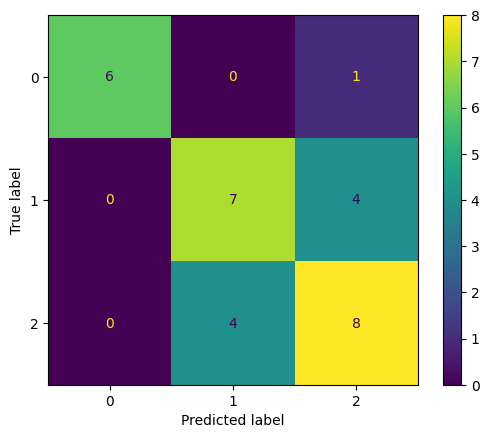

In [24]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("BGR Best Weights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_BGR_Bestweights_model1.png")

In [25]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


<hr>

### HSV Space

#### Normal Weights

In [26]:
model = load_model('models/IncRes_HSV+Contrast_model1.hdf5')
model.load_weights('weights/IncRes_HSV+Contrast_model1.hdf5')

In [27]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"HSV")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()


1/1 [==============================] - 1s 1s/step
Pred Prob: [1.0, 5.1797833e-09, 8.4749256e-11]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.99958163, 6.270296e-07, 0.00041780475]


/tmp/ipykernel_9329/1593659242.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/1593659242.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.00016905346, 0.027425386, 0.97240555]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [0.003960531, 0.77397454, 0.22206487]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.9858041, 0.013796595, 0.00039930505]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.99995935, 4.061529e-05, 1.6626972e-08]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.95032275, 7.1318323e-06, 0.04967008]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.9228015, 0.07713575, 6.275058e-05]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [3.4584673e-06, 0.041878868, 0.9581177]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [8.720407e-06, 0.9999156, 7.567608e-05]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.004614517, 0.7900112, 0.2053742]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [2.856831e-05, 

HSV NormalWeights
Accuracy : 0.7 

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.70      0.64      0.67        11
           2       0.67      0.67      0.67        12

    accuracy                           0.70        30
   macro avg       0.71      0.72      0.71        30
weighted avg       0.70      0.70      0.70        30



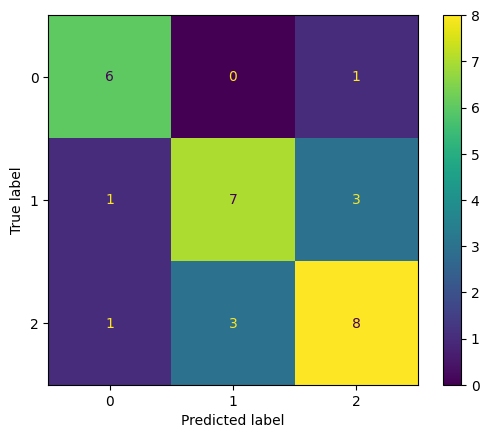

In [28]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("HSV NormalWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_HSV+contrast_model1.png")

In [29]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


#### Best Weights

In [30]:
model = load_model('models/IncRes_HSV+Contrast_model1.hdf5')
model.load_weights('best_weights/IncRes_HSV+Contrast_model1.hdf5')

In [31]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"HSV")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()


1/1 [==============================] - 2s 2s/step
Pred Prob: [1.0, 1.1588303e-08, 4.3596855e-09]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.9995178, 5.9642816e-06, 0.00047623378]


/tmp/ipykernel_9329/1593659242.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/1593659242.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.00045238505, 0.124980815, 0.87456685]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.021981902, 0.9567225, 0.02129554]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.96827805, 0.015339518, 0.016382454]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.99995565, 4.4219498e-05, 6.135971e-08]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.97822964, 4.386285e-05, 0.021726426]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.88962924, 0.1006085, 0.009762246]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [4.3646323e-06, 0.036958233, 0.96303743]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [1.316568e-05, 0.99997973, 7.1039562e-06]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.0013238782, 0.85545856, 0.1432175]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.0002345650

HSV BestWeights
Accuracy : 0.6333333333333333 

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.62      0.45      0.53        11
           2       0.57      0.67      0.62        12

    accuracy                           0.63        30
   macro avg       0.65      0.66      0.65        30
weighted avg       0.63      0.63      0.63        30



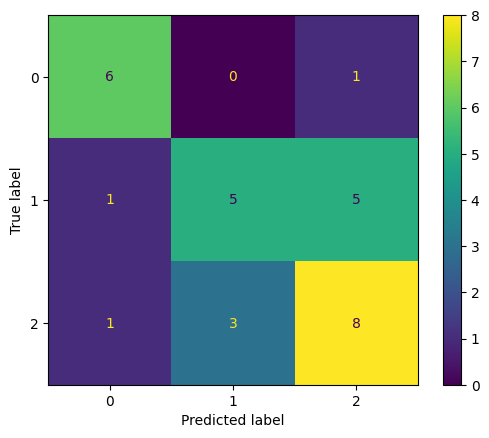

In [32]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("HSV BestWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_HSV+contrast_BestWeights_model1.png")

In [33]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


<hr>

### HLS Space

#### Normal Weights

In [34]:
model = load_model('models/IncRes_HLS+contrast_model1.hdf5')
model.load_weights('weights/IncRes_HLS+contrast_model1.hdf5')

In [35]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"HLS")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()


1/1 [==============================] - 2s 2s/step
Pred Prob: [0.9999982, 1.814285e-08, 1.8339725e-06]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.9836881, 0.016304515, 7.3673737e-06]


/tmp/ipykernel_9329/1561126268.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/1561126268.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0013707756, 0.2715649, 0.7270643]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.18143122, 0.46398965, 0.35457915]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.005830632, 0.2252566, 0.7689128]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.995618, 0.004381837, 2.0459329e-07]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.9757259, 0.023812665, 0.00046143963]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.03339512, 0.3318722, 0.63473266]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [7.692813e-07, 0.01780105, 0.9821982]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [6.968531e-05, 0.99968326, 0.00024699158]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.90922856, 0.0033939148, 0.08737746]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0006922419, 0.99927217,

HLS NormalWeights
Accuracy : 0.6666666666666666 

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.62      0.45      0.53        11
           2       0.75      0.75      0.75        12

    accuracy                           0.67        30
   macro avg       0.66      0.69      0.66        30
weighted avg       0.67      0.67      0.66        30



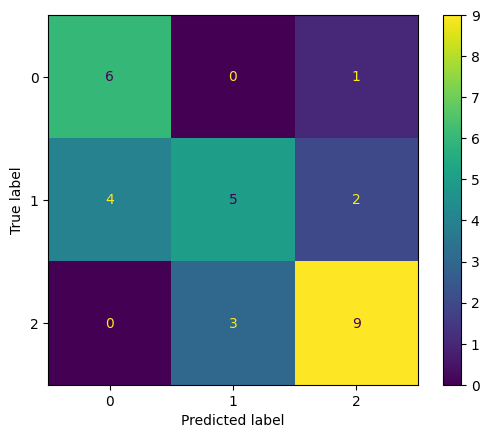

In [36]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("HLS NormalWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_HLS_model1.png")

In [37]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


#### Best Weights

In [38]:
model = load_model('models/IncRes_HLS+contrast_model1.hdf5')
model.load_weights('best_weights/IncRes_HLS+contrast_model1.hdf5')

In [39]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"HLS")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()


1/1 [==============================] - 1s 1s/step
Pred Prob: [0.999997, 1.2026747e-08, 2.9405192e-06]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.9754802, 0.024273152, 0.00024660976]


/tmp/ipykernel_9329/1561126268.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/1561126268.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 23ms/step
Pred Prob: [0.0012835624, 0.15818615, 0.8405303]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.11251189, 0.16663691, 0.72085124]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.008183787, 0.08816336, 0.9036529]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.991118, 0.008879928, 2.016202e-06]
1/1 [==============================] - 0s 20ms/step
Pred Prob: [0.99755883, 0.002373682, 6.738609e-05]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0037269024, 0.45210865, 0.5441644]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [8.520674e-08, 2.3138016e-05, 0.99997675]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.00026905528, 0.99911994, 0.000611009]
1/1 [==============================] - 0s 24ms/step
Pred Prob: [0.8808358, 0.013842711, 0.10532139]
1/1 [==============================] - 0s 31ms/step
Pred Prob: [0.0003923292, 0.99948

HLS BestWeights
Accuracy : 0.7 

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.67      0.55      0.60        11
           2       0.75      0.75      0.75        12

    accuracy                           0.70        30
   macro avg       0.69      0.72      0.70        30
weighted avg       0.70      0.70      0.70        30



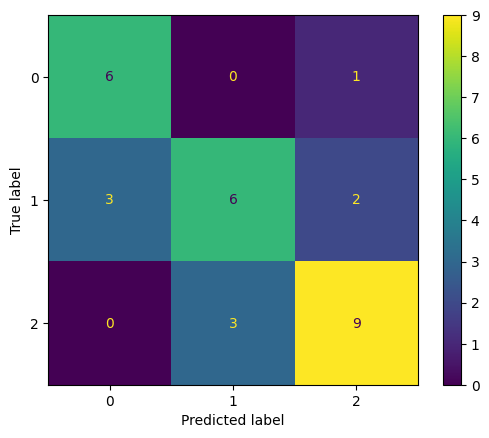

In [40]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("HLS BestWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_HLS_Bestweights_model1.png")

In [41]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


<hr>

### LAB

In [42]:
model = load_model('models/IncRes_LAB+contrast_model1.hdf5')
model.load_weights('best_weights/IncRes_LAB+contrast_model1.hdf5')

In [44]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"LAB")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()


1/1 [==============================] - 0s 21ms/step
Pred Prob: [1.0, 1.6001223e-10, 3.4081555e-08]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0043144114, 5.0681024e-06, 0.99568045]


/tmp/ipykernel_9329/243951390.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/243951390.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 22ms/step
Pred Prob: [1.5970207e-05, 0.48819506, 0.51178896]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [0.0007481593, 0.015362789, 0.9838891]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.04665204, 0.0008077103, 0.9525403]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.81961757, 0.18038188, 6.12506e-07]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.8188846, 0.18103914, 7.626338e-05]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [0.10118045, 0.008905919, 0.8899136]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [2.0914215e-06, 0.0029643693, 0.9970335]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [1.2661814e-05, 0.13948874, 0.86049867]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.9983701, 3.3475203e-06, 0.001626615]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.0005161126, 0.59

LAB BestWeights
Accuracy : 0.6666666666666666 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.67      0.18      0.29        11
           2       0.58      0.92      0.71        12

    accuracy                           0.67        30
   macro avg       0.71      0.70      0.64        30
weighted avg       0.68      0.67      0.61        30



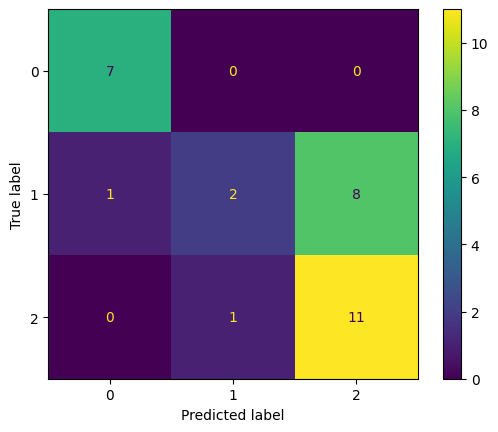

In [45]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("LAB BestWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_HLS_Bestweights_model1.png")

In [46]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


### LUV

In [47]:
model = load_model('models/IncRes_LUV+contrast_model1.hdf5')
model.load_weights('best_weights/IncRes_LUV+contrast_model1.hdf5')

In [48]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"LUV")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()


1/1 [==============================] - 1s 1s/step
Pred Prob: [0.9999989, 1.0155769e-06, 3.28928e-08]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.017084697, 1.2530162e-06, 0.98291403]


/tmp/ipykernel_9329/1884240855.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:
/tmp/ipykernel_9329/1884240855.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.00014322744, 0.5294355, 0.4704213]
1/1 [==============================] - 0s 23ms/step
Pred Prob: [0.00022534166, 0.53513694, 0.46463776]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.590549, 0.075185314, 0.33426565]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.99988914, 0.00011089019, 1.9189574e-09]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.8942475, 0.10558935, 0.00016321239]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.93951803, 0.022972653, 0.037509352]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0008870522, 0.30170098, 0.69741195]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.0006049711, 0.74650514, 0.25288996]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.9741556, 0.0023434558, 0.023500938]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [2.1086153e-05, 0.

LUV BestWeights
Accuracy : 0.7 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.60      0.55      0.57        11
           2       0.67      0.67      0.67        12

    accuracy                           0.70        30
   macro avg       0.71      0.74      0.72        30
weighted avg       0.69      0.70      0.69        30



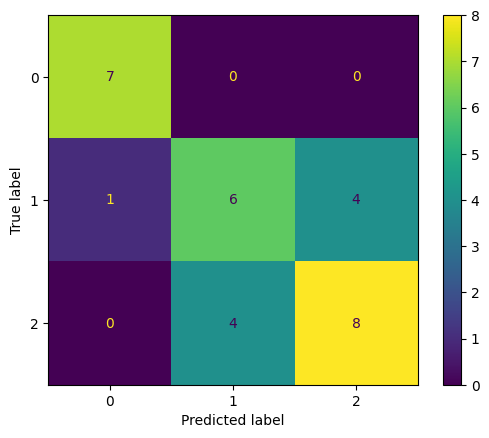

In [49]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("LUV BestWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_HLS_Bestweights_model1.png")

In [50]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]


### Resnet 

In [10]:
model = load_model('models/Resn101_BGR+Contrast_model1.hdf5')
model.load_weights('best_weights/Resn101_BGR+Contrast_model1.hdf5')

2023-01-26 02:27:04.914849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 02:27:04.918849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 02:27:04.919079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 02:27:04.919468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [11]:
y_pred = []
for i,image_path in enumerate(x_test):
    predictions,preds = predictor(image_path,"BGR")
    y_pred1 = classes.index(predictions[0])
    try:
        y_pred2 = classes.index(predictions[1])
    except:
        y_pred2 = []
    try:
        y_pred3 = classes.index(predictions[2])
    except:
        y_pred3 = []
#     print(image_path,": Predicted :",y_pred1, y_pred2, "Real :",y_test[i])
    if y_pred1 == y_test[i]:
        y_pred.append(y_pred1)
    elif y_pred2 == y_test[i]:
        y_pred.append(y_pred2)
    elif y_pred3 == y_test[i]:
        y_pred.append(y_pred3)
    else:
        y_pred.append(y_pred1)
#     plt.imshow(plt.imread(image_path))
#     plt.show()


2023-01-26 02:27:10.258047: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-01-26 02:27:10.609544: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-26 02:27:10.610045: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-26 02:27:10.610061: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-01-26 02:27:10.610469: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-26 02:27:10.610510: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-01-26 02:27:11.779499:

1/1 [==============================] - 3s 3s/step


2023-01-26 02:27:12.012972: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-01-26 02:27:12.012998: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-01-26 02:27:12.033666: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-01-26 02:27:12.033681: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

Pred Prob: [0.99975294, 2.7770905e-10, 0.00024705447]
1/1 [==============================] - 0s 25ms/step
Pred Prob: [0.18359245, 0.0047100917, 0.8116974]


/tmp/ipykernel_24065/3350467877.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred3 == y_test[i]:


1/1 [==============================] - 0s 22ms/step
Pred Prob: [4.106641e-10, 0.9956584, 0.0043416107]


/tmp/ipykernel_24065/3350467877.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif y_pred2 == y_test[i]:


1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.00034191483, 0.13230042, 0.8673577]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.0032237694, 0.68432593, 0.31245026]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.9999999, 2.843933e-09, 1.7104406e-07]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.999998, 1.9599333e-06, 6.115456e-08]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0016645064, 0.0004331842, 0.9979023]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [1.8463374e-05, 3.8261962e-05, 0.99994326]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.0003272929, 0.9423474, 0.057325277]
1/1 [==============================] - 0s 22ms/step
Pred Prob: [0.0027409594, 0.00064958556, 0.99660945]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [0.00032838955, 0.86087936, 0.13879222]
1/1 [==============================] - 0s 21ms/step
Pred Prob: [5.2016

LUV BestWeights
Accuracy : 0.5 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.29      0.18      0.22        11
           2       0.44      0.58      0.50        12

    accuracy                           0.50        30
   macro avg       0.53      0.54      0.53        30
weighted avg       0.48      0.50      0.48        30



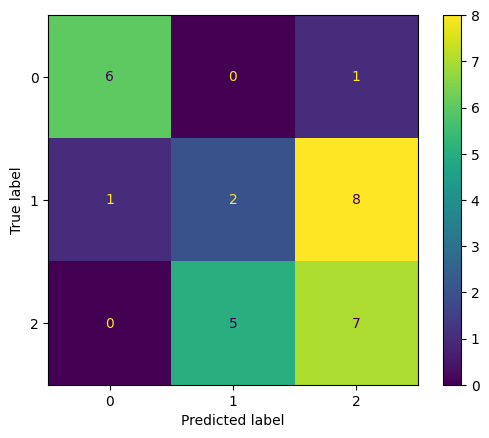

In [12]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

confusion = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

print("LUV BestWeights")
print("Accuracy :",acc,"\n")
print(classification_report(y_true=y_test, y_pred=y_pred))
# plt.savefig("confusionmatrix_HLS_Bestweights_model1.png")

In [13]:
print("Predicted",y_pred)
print("True     ",list(y_test))

Predicted [0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2]
True      [0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2]
